# Assignemnt part 2:
In this assignment we build Self organising maps and explore them. 

## Topological ordering of animal species
We are given a dataset of animal species and their features. We are to build a self organising map and use it to find the topological ordering of the animal species. The data is from animals.dat 


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

[(72, 'antelop'), (7, 'ape'), (37, 'bat'), (13, 'bear'), (0, 'beetle'), (0, 'butterfly'), (84, 'camel'), (27, 'cat'), (3, 'crocodile'), (19, 'dog'), (0, 'dragonfly'), (1, 'duck'), (44, 'elephant'), (5, 'frog'), (78, 'giraffe'), (0, 'grasshopper'), (99, 'horse'), (0, 'housefly'), (16, 'hyena'), (65, 'kangaroo'), (32, 'lion'), (0, 'moskito'), (1, 'ostrich'), (1, 'pelican'), (1, 'penguin'), (91, 'pig'), (58, 'rabbit'), (51, 'rat'), (2, 'seaturtle'), (23, 'skunk'), (0, 'spider'), (10, 'walrus')]


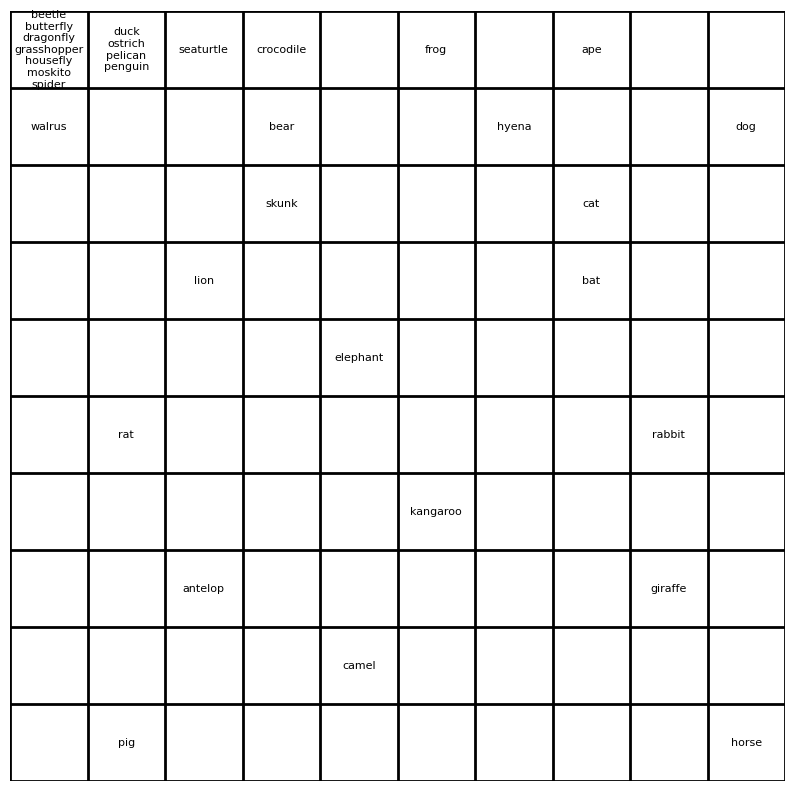

In [67]:
# Initialize the weights
weights = np.random.rand(100, 84)
weights = np.random.uniform(0, 1, (100, 84))


# Load the data
def load_data():

    # Load the data and conver into 32 x 84
    animals = np.genfromtxt("Dataset/animals.dat", delimiter=",")
    animals = animals.reshape(32, 84)

    file = open("Dataset/animalnames.txt", "r")
    animalnames = file.read().splitlines()
    # remove the "'" and \t from the animalnames
    animalnames = [x.replace("'", "") for x in animalnames]
    animalnames = [x.replace("\t", "") for x in animalnames]
    file.close()

    return animals, animalnames


def SOM(dataset, epochs, weights, initial_neighbours=50, learning_rate=0.2):
    n_samples = dataset.shape[0]
    n_nodes = weights.shape[0]
    real_distance = initial_neighbours  # Start with the initial neighborhood size

    for epoch in range(epochs):
        # Decrease the neighborhood size over time without rounding
        real_distance -= (initial_neighbours - 1) / epochs
        # Use the rounded value for the neighborhood calculation
        neighbours_left = round(real_distance)

        for sample in range(n_samples):
            # Compute the minimum node (winner)
            distance = np.linalg.norm(dataset[sample, :] - weights, axis=1)
            winner = np.argmin(distance)

            # Compute the neighbourhood boundaries
            min_neighbour = int(max(0, winner - neighbours_left))
            max_neighbour = int(min(n_nodes, winner + neighbours_left))

            # Update the weights for nodes within the neighborhood
            for node in range(min_neighbour, max_neighbour):
                weights[node] += learning_rate * (dataset[sample] - weights[node])

    return weights


def find_winners(dataset, weights):
    """
    Loops through each sample in the dataset, finds the winning node in the SOM,
    and returns a list of indices corresponding to the winning node for each sample.
    """
    n_samples = dataset.shape[0]
    n_nodes = weights.shape[0]
    distance = np.zeros(n_nodes)
    winners = []

    for sample in range(n_samples):
        # Compute the distance from the sample to each node's weights
        for node in range(n_nodes):
            distance[node] = np.linalg.norm(dataset[sample, :] - weights[node, :])
        # Find the winning node
        winner = np.argmin(distance)
        winners.append(winner)

    return winners


def visualize_animal_SOM(winners_with_names, grid_size=(10, 10)):
    """
    Visualize the SOM grid with each node displaying the corresponding animal(s).

    :param winners_with_names: A list of tuples (node, animal_name).
    :param grid_size: A tuple (rows, cols) representing the size of the SOM grid.
    """
    # Create a dictionary where each key is a node and each value is a list of animals for that node
    node_animals = {}
    for node, animal in winners_with_names:
        if node not in node_animals:
            node_animals[node] = []
        node_animals[node].append(animal)

    # Calculate the number of rows and columns for the grid
    rows, cols = grid_size

    # Create the plot
    fig, ax = plt.subplots(figsize=(cols, rows))
    ax.set_xlim([0, cols])
    ax.set_ylim([0, rows])
    ax.invert_yaxis()  # Invert the y-axis so the first row starts at the top

    # Remove the axes
    plt.axis("off")

    # Add animals to the nodes in the grid
    for node, animals in node_animals.items():
        x = node % cols
        y = node // cols
        ax.text(
            x + 0.5, y + 0.5, "\n".join(animals), ha="center", va="center", fontsize=8
        )

    # Draw grid lines
    for x in range(cols + 1):
        ax.axvline(x, lw=2, color="k", zorder=5)
    for y in range(rows + 1):
        ax.axhline(y, lw=2, color="k", zorder=5)

    # Show the SOM grid
    plt.show()


# Load the data
animal, animalnames = load_data()

# Train the SOM
weights = SOM(animal, 1000, weights)

# Find the winners
winners = find_winners(animal, weights)


# Create tuple of each winning node index with the corresponding animal name
winners_with_names = [(win, animalnames[idx]) for idx, win in enumerate(winners)]
print(winners_with_names)

# Visualise the SOM grid
visualize_animal_SOM(winners_with_names, grid_size=(10, 10))